In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import rankdata
%matplotlib inline

In [2]:
##read in data
data=pd.read_csv("data/shot_logs.csv")

In [95]:
data.head(15)

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
5,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,6,2,8:15,9.1,2,...,18.4,2,missed,"Williams, Deron",101114,2.6,0,0,brian roberts,203148
6,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,7,4,10:15,14.5,11,...,20.7,2,missed,"Jack, Jarrett",101127,6.1,0,0,brian roberts,203148
7,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,8,4,8:00,3.4,3,...,3.5,2,made,"Plumlee, Mason",203486,2.1,1,2,brian roberts,203148
8,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,9,4,5:14,12.4,0,...,24.6,3,missed,"Morris, Darius",202721,7.3,0,0,brian roberts,203148
9,21400890,"MAR 03, 2015 - CHA vs. LAL",H,W,1,1,2,11:32,17.4,0,...,22.4,3,missed,"Ellington, Wayne",201961,19.8,0,0,brian roberts,203148


In [4]:
##data features
print data.columns.values

['GAME_ID' 'MATCHUP' 'LOCATION' 'W' 'FINAL_MARGIN' 'SHOT_NUMBER' 'PERIOD'
 'GAME_CLOCK' 'SHOT_CLOCK' 'DRIBBLES' 'TOUCH_TIME' 'SHOT_DIST' 'PTS_TYPE'
 'SHOT_RESULT' 'CLOSEST_DEFENDER' 'CLOSEST_DEFENDER_PLAYER_ID'
 'CLOSE_DEF_DIST' 'FGM' 'PTS' 'player_name' 'player_id']


'GAME_ID': Game index  
'MATCHUP': Time and teams  
'LOCATION': home or away  
'W': win or lost  
'FINAL_MARGIN': gap of points  
'SHOT_NUMBER': shot index of a streak  
'PERIOD': in which period of the match the shoot happened  
'GAME_CLOCK': game time (count-down manner)  
'SHOT_CLOCK': shot-time (count-down)  
'DRIBBLES'  
'TOUCH_TIME'  
'SHOT_DIST'  
'PTS_TYPE'  
'SHOT_RESULT'  
'CLOSEST_DEFENDER'  
'CLOSEST_DEFENDER_PLAYER_ID'  
'CLOSE_DEF_DIST': closest defender distance  
'FGM': binary indicator of shot result, made (1) or miss (0)  
'PTS': points  
'player_name'  
'player_id'

In [3]:
##split matchup
foo = lambda x: pd.Series([i for i in x.split(' - ')])
s = data['MATCHUP'].apply(foo)
s.rename(columns={0:'Date',1:'Teams'},inplace=True)
data2=data.join(s)
del data2['MATCHUP']

In [4]:
##remove some useless columns
del data2['SHOT_RESULT']
#del data2['CLOSEST_DEFENDER']
#del data2['CLOSEST_DEFENDER_PLAYER_ID']
data2.columns=map(str.lower,data2.columns)

In [27]:
data2.head(10)

,game_id,location,w,final_margin,shot_number,period,game_clock,shot_clock,dribbles,touch_time,...,pts_type,closest_defender,closest_defender_player_id,close_def_dist,fgm,pts,player_name,player_id,date,teams
0,21400899,A,W,24,1,1,1:09,10.8,2,1.9,...,2,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148,"MAR 04, 2015",CHA @ BKN
1,21400899,A,W,24,2,1,0:14,3.4,0,0.8,...,3,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148,"MAR 04, 2015",CHA @ BKN
2,21400899,A,W,24,3,1,0:00,NaN,3,2.7,...,2,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148,"MAR 04, 2015",CHA @ BKN
3,21400899,A,W,24,4,2,11:47,10.3,2,1.9,...,2,"Brown, Markel",203900,3.4,0,0,brian roberts,203148,"MAR 04, 2015",CHA @ BKN
4,21400899,A,W,24,5,2,10:34,10.9,2,2.7,...,2,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148,"MAR 04, 2015",CHA @ BKN
5,21400899,A,W,24,6,2,8:15,9.1,2,4.4,...,2,"Williams, Deron",101114,2.6,0,0,brian roberts,203148,"MAR 04, 2015",CHA @ BKN
6,21400899,A,W,24,7,4,10:15,14.5,11,9.0,...,2,"Jack, Jarrett",101127,6.1,0,0,brian roberts,203148,"MAR 04, 2015",CHA @ BKN
7,21400899,A,W,24,8,4,8:00,3.4,3,2.5,...,2,"Plumlee, Mason",203486,2.1,1,2,brian roberts,203148,"MAR 04, 2015",CHA @ BKN
8,21400899,A,W,24,9,4,5:14,12.4,0,0.8,...,3,"Morris, Darius",202721,7.3,0,0,brian roberts,203148,"MAR 04, 2015",CHA @ BKN
9,21400890,H,W,1,1,2,11:32,17.4,0,1.1,...,3,"Ellington, Wayne",201961,19.8,0,0,brian roberts,203148,"MAR 03, 2015",CHA vs. LAL


In [28]:
## group by match and player ID
data3=pd.DataFrame({'count' : data2.groupby(['player_id', 'game_id']).size()}).reset_index()
game_played=pd.DataFrame({'games':data3.groupby(['player_id']).size()}).reset_index()
data3.head(10)

,player_id,game_id,count
0,708,21400006,8
1,708,21400033,15
2,708,21400044,8
3,708,21400060,7
4,708,21400075,3
5,708,21400090,9
6,708,21400116,8
7,708,21400121,5
8,708,21400138,7
9,708,21400149,4


In [37]:
print np.std(data3['count'])
print np.mean(data3['count'])

5.23857206862
8.92902461131


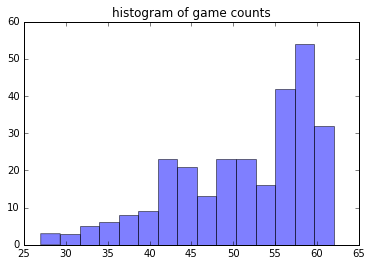

In [148]:
## draw shoot count histogram for games played of players
n, bins, patches = plt.hist(game_played['games'], 15, facecolor='blue', alpha=0.5)
plt.title('histogram of game counts')

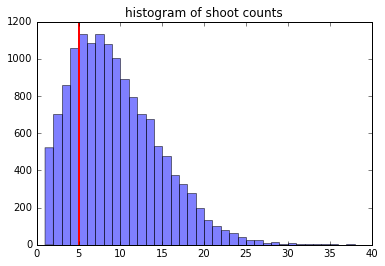

In [101]:
## draw shoot count histogram for player-game combination
n, bins, patches = plt.hist(data3['count'], (data3['count'].max()-data3['count'].min()), facecolor='blue', alpha=0.5)
plt.axvline(5,linewidth=2,color='red')
plt.title('histogram of shoot counts')

From the histogram. 5 seems to be a good critical value for determining if the data should be considered in our project. It is the start of the peak (mode). If we use data less than 5, we might find no interesting streak to analyze. Also, there might be too many noises or ramdomness. Even a player with 50% accuracy (pretty high in NBA) will miss 3 shoots in sequence with probability of 1/8. Note, all playes in our data has played at least 27 games, so no need to worry about the sample size. 

In [9]:
##remove rows less than 5 shoots per game
data4=data3.iloc[np.where(data3['count']>=5)[0],:-1]
comb = set(data4.itertuples(index=False)) ## generate combination of player_id and game_id
mask = [x in comb for x in data2[['player_id','game_id']].itertuples(index=False)] ## find if that row is in the combination
data5=data2.iloc[mask,:]
data5=data5.reset_index()

In [10]:
data5.head(15)

,index,game_id,location,w,final_margin,shot_number,period,game_clock,shot_clock,dribbles,...,pts_type,closest_defender,closest_defender_player_id,close_def_dist,fgm,pts,player_name,player_id,date,teams
0,0,21400899,A,W,24,1,1,1:09,10.8,2,...,2,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148,"MAR 04, 2015",CHA @ BKN
1,1,21400899,A,W,24,2,1,0:14,3.4,0,...,3,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148,"MAR 04, 2015",CHA @ BKN
2,2,21400899,A,W,24,3,1,0:00,NaN,3,...,2,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148,"MAR 04, 2015",CHA @ BKN
3,3,21400899,A,W,24,4,2,11:47,10.3,2,...,2,"Brown, Markel",203900,3.4,0,0,brian roberts,203148,"MAR 04, 2015",CHA @ BKN
4,4,21400899,A,W,24,5,2,10:34,10.9,2,...,2,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148,"MAR 04, 2015",CHA @ BKN
5,5,21400899,A,W,24,6,2,8:15,9.1,2,...,2,"Williams, Deron",101114,2.6,0,0,brian roberts,203148,"MAR 04, 2015",CHA @ BKN
6,6,21400899,A,W,24,7,4,10:15,14.5,11,...,2,"Jack, Jarrett",101127,6.1,0,0,brian roberts,203148,"MAR 04, 2015",CHA @ BKN
7,7,21400899,A,W,24,8,4,8:00,3.4,3,...,2,"Plumlee, Mason",203486,2.1,1,2,brian roberts,203148,"MAR 04, 2015",CHA @ BKN
8,8,21400899,A,W,24,9,4,5:14,12.4,0,...,3,"Morris, Darius",202721,7.3,0,0,brian roberts,203148,"MAR 04, 2015",CHA @ BKN
9,14,21400859,A,L,-8,1,1,0:48,6.8,0,...,3,"Smart, Marcus",203935,5.3,0,0,brian roberts,203148,"FEB 27, 2015",CHA @ BOS


In [121]:
##write the csv
data5.to_csv('data/shot_logs_filtered.csv',index=False)

In [11]:
data6=pd.DataFrame(data5[['player_name', 'fgm']].groupby(['player_name']).mean()).reset_index()
top_players=data6.sort('fgm', ascending=False)[:5]

C:\Users\Michaelhua\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


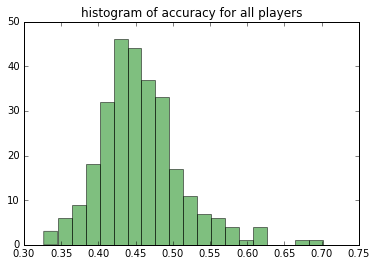

In [48]:
## draw shoot accuracy histogram for player-game combination
n, bins, patches = plt.hist(data6['fgm'], 20, facecolor='green', alpha=0.5)
plt.title('histogram of accuracy for all players')

In [51]:
print data5['shot_dist'].mean()
print data_top['shot_dist'].mean()

13.5912502828
4.98186010761


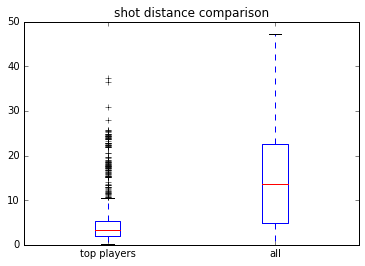

In [55]:
plt.boxplot([data_top['shot_dist'],data5['shot_dist']])
plt.xticks([1, 2], ['top players', 'all'])
plt.title('shot distance comparison')

In [39]:
top_players

,player_name,fgm
66,deandre jordan,0.702065
269,tyson chandler,0.675862
14,andre miller,0.623377
108,james johnson,0.621951
187,mason plumlee,0.618911


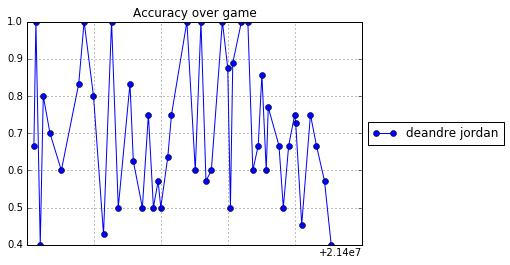

In [42]:
for player in ['deandre jordan']:
    x=data7.loc[data7['player_name'] == player]['game_id']
    y=data7.loc[data7['player_name'] == player]['fgm']
    plt.plot(x,y,'o-',label=player)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.title('Accuracy over game')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off

In [171]:
data5['player_name'].unique()

array(['brian roberts', 'bismack biyombo', 'al jefferson', 'cody zeller',
       'gary neal', 'gerald henderson', 'kemba walker',
       'michael kidd-gilchrist', 'lance stephenson', 'marvin williams',
       'jason maxiell', 'gordon hayward', 'trevor booker', 'enes kanter',
       'derrick favors', 'dante exum', 'jon ingles', 'trey burke',
       'rudy gobert', 'carlos boozer', 'jeremy lin', 'kobe bryant',
       'ed davis', 'ronnie price', 'wayne ellington', 'wesley johnson',
       'jordan hill', 'nick young', 'robert sacre', 'harrison barnes',
       'leandro barbosa', 'stephen curry', 'klay thompson',
       'marreese speights', 'shaun livingston', 'andrew bogut',
       'andre iguodala', 'draymond green', 'al horford', 'thabo sefolosha',
       'dennis schroder', 'paul millsap', 'kyle korver', 'pero antic',
       'kent bazemore', 'mike scott', 'jeff teague', 'demarre carroll',
       'marcin gortat', 'otto porter', 'kris humphries', 'bradley beal',
       'andre miller', 'garret

In [40]:
mask = [x in top_players['player_name'].tolist() for x in data5['player_name']]
data_top=data5.iloc[mask,:]

In [41]:
data7=pd.DataFrame(data_top[['player_name', 'game_id','fgm']].groupby(['player_name', 'game_id']).mean()).reset_index()
data7.head()

,player_name,game_id,fgm
0,andre miller,21400051,0.600000
1,andre miller,21400190,0.666667
2,andre miller,21400236,0.333333
3,andre miller,21400350,0.833333
4,andre miller,21400419,0.666667


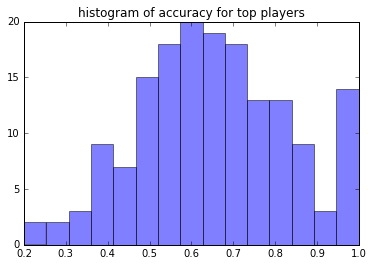

In [188]:
## draw shoot accuracy histogram for player-game combination
n, bins, patches = plt.hist(data7['fgm'], 15, facecolor='blue', alpha=0.5)
plt.title('histogram of accuracy for top players')

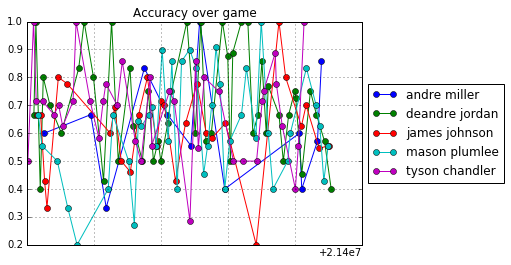

In [183]:
for player in data7['player_name'].unique().tolist():
    x=data7.loc[data7['player_name'] == player]['game_id']
    y=data7.loc[data7['player_name'] == player]['fgm']
    plt.plot(x,y,'o-',label=player)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.title('Accuracy over game')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off

In [32]:
## convert each shoot into a character
groups = data5.groupby(['player_id','player_name','game_id'])
data8=pd.DataFrame()
for key, value in groups:
    lst=[str(x) for x in value['fgm'].tolist()]
    string=''.join(lst)
    data8 = data8.append({'player_id':str(key[0]),'player_name':key[1], 'game_id': str(key[2]), 'shot_row': string}, ignore_index=True)

In [33]:
data8.to_csv('data/shot_row.csv',index=False)

In [34]:
data8.head()

,game_id,player_id,player_name,shot_row
0,21400006,708,kevin garnett,01101110
1,21400033,708,kevin garnett,010001110011001
2,21400044,708,kevin garnett,00010101
3,21400060,708,kevin garnett,0010000
4,21400090,708,kevin garnett,000010101


In [12]:
## input: string and index of the sting
## output: the longest shooting streak (miss,made)
def find_streak(string,position):
    if position==0:
        return 0,0
    else:
        n=0
        #print string,len(string),position-1
        char=string[position-1]
        for i in range(1,position+1):
            cur=position-i
            if string[cur]==char:
                n+=1
            else:
                break
        if char=='0':
            return n,0
        else:
            return 0,n

In [5]:
#data5=pd.read_csv("data\shot_logs_filtered.csv")
data8=pd.read_csv("data\shot_row.csv")

In [14]:
##merge two dataframes
tmp=pd.merge(data5,data8)
del tmp['index']

In [15]:
##fix the error in shot_number
for index in tmp.index.tolist():
    row=tmp.ix[index]
    if index%10000==0:
        print index
    if index!=0:
        prev=tmp.ix[index-1]
        if row['game_id']!=prev['game_id']:
                tmp.iloc[index,4]=1
        else:
            tmp.iloc[index,4]=int(tmp.iloc[index-1,4])+1

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000


In [9]:
tmp.iloc[4369:4378,4]

4369     4
4370     5
4371     6
4372     7
4373     8
4374     9
4375    10
4376    11
4377    12
Name: shot_number, dtype: int64

In [16]:
#for i in range(4369,4378):
    #tmp.iloc[i,4]=i-4369+4

## find the streak
n_miss=[]
n_made=[]
for index, row in tmp.iterrows():
    if index%10000==0:
        print index
    pos=row['shot_number']-1
    s=row['shot_row']
    result=find_streak(s,pos)
    n_miss.append(result[0])
    n_made.append(result[1])


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000


In [17]:
dn=pd.DataFrame([np.array(n_miss),np.array(n_made)])
dn=dn.T
dn.columns=['miss','made']


In [19]:
df=pd.concat([tmp,dn],axis=1)

In [21]:
df.columns

Index([u'game_id', u'location', u'w', u'final_margin', u'shot_number',
       u'period', u'game_clock', u'shot_clock', u'dribbles', u'touch_time',
       u'shot_dist', u'pts_type', u'closest_defender',
       u'closest_defender_player_id', u'close_def_dist', u'fgm', u'pts',
       u'player_name', u'player_id', u'date', u'teams', u'shot_row', u'miss',
       u'made'],
      dtype='object')

In [33]:
df.head()
## miss is the streak of miss, if miss = n, it meams before this shoot, the player has missed n shoots.
## made is similar to miss

,game_id,location,w,final_margin,shot_number,period,game_clock,shot_clock,dribbles,touch_time,...,close_def_dist,fgm,pts,player_name,player_id,date,teams,shot_row,miss,made
0,21400899,A,W,24,1,1,1:09,10.8,2,1.9,...,1.3,1,2,brian roberts,203148,"MAR 04, 2015",CHA @ BKN,100000010,0,0
1,21400899,A,W,24,2,1,0:14,3.4,0,0.8,...,6.1,0,0,brian roberts,203148,"MAR 04, 2015",CHA @ BKN,100000010,0,1
2,21400899,A,W,24,3,1,0:00,NaN,3,2.7,...,0.9,0,0,brian roberts,203148,"MAR 04, 2015",CHA @ BKN,100000010,1,0
3,21400899,A,W,24,4,2,11:47,10.3,2,1.9,...,3.4,0,0,brian roberts,203148,"MAR 04, 2015",CHA @ BKN,100000010,2,0
4,21400899,A,W,24,5,2,10:34,10.9,2,2.7,...,1.1,0,0,brian roberts,203148,"MAR 04, 2015",CHA @ BKN,100000010,3,0


In [22]:
df.to_csv('data/shot_final2.csv',index=False)

In [32]:
df=pd.read_csv('data/shot_final2.csv')

In [63]:
print len(np.where(((df['miss']!=0) & (df['fgm']==0)))[0])
print len(np.where(((df['made']!=0) & (df['fgm']==0)))[0])
print len(np.where(((df['miss']!=0) & (df['fgm']==1)))[0])
print len(np.where(((df['made']!=0) & (df['fgm']==1)))[0])

31419
27431
26939
22348


In [8]:
## convert each shoot into a character
groups = data.groupby(['player_id','player_name','GAME_ID'])
data9=pd.DataFrame()
for key, value in groups:
    lst=[str(x) for x in value['FGM'].tolist()]
    string=''.join(lst)
    data9 = data9.append({'player_id':str(key[0]),'player_name':key[1], 'game_id': str(key[2]), 'shot_row': string}, ignore_index=True)

In [6]:
#data9=pd.read_csv('data/shot_row.csv')

In [7]:
data9.head()

,game_id,player_id,player_name,shot_row
0,21400006,708,kevin garnett,01101110
1,21400033,708,kevin garnett,010001110011001
2,21400044,708,kevin garnett,00010101
3,21400060,708,kevin garnett,0010000
4,21400090,708,kevin garnett,000010101


In [9]:
stat=np.zeros((data9.shape[0],2))
for i in range(data9.shape[0]):
    row=data9['shot_row'].iloc[i]
    stat[i,0]=len(row) ## number of attempt
    made=0.0
    for j in range(len(row)):
        if row[j]=='1':
            made+=1.0
    stat[i,1]=made/stat[i,0]

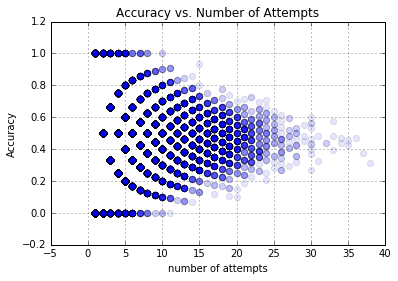

In [20]:
plt.scatter(stat[:,0],stat[:,1],s=40,alpha=0.1)
#plt.scatter(stat[:,0],stat[:,1],s=40,facecolors='none')
plt.xlabel("number of attempts")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Attempts")
plt.grid()
plt.show()

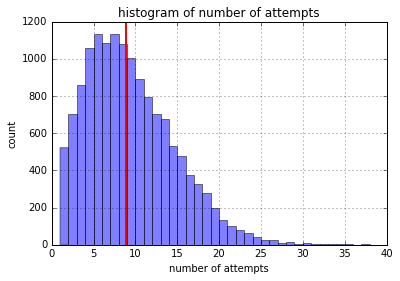

In [31]:
## draw shoot count histogram for player-game combination
n, bins, patches = plt.hist(data3['count'], (data3['count'].max()-data3['count'].min()), facecolor='blue', alpha=0.5)
plt.axvline(np.mean(data3['count']),linewidth=2,color='red')
plt.xlabel('number of attempts')
plt.ylabel('count')
plt.title('histogram of number of attempts')
plt.grid()
plt.show()

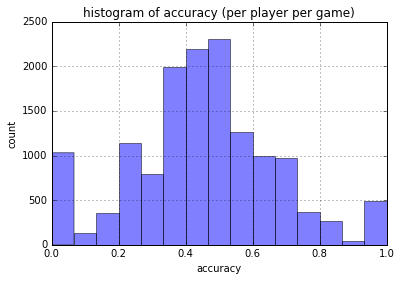

In [30]:
## draw shoot count histogram for player-game combination
n, bins, patches = plt.hist(stat[:,1],15, facecolor='blue', alpha=0.5)
plt.xlabel('accuracy')
plt.ylabel('count')
plt.title('histogram of accuracy (per player per game)')
plt.grid()
plt.show()